<a href="https://colab.research.google.com/github/Arpan-Maity032/Machine-Learning-project/blob/master/Machine_Learning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [68]:
from google.colab import files

In [69]:
files.upload()

Saving oasis_longitudinal.csv to oasis_longitudinal (1).csv


{'oasis_longitudinal (1).csv': b'Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF\r\nOAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2,27,0,1987,0.696,0.883\r\nOAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2,30,0,2004,0.681,0.876\r\nOAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,,23,0.5,1678,0.736,1.046\r\nOAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,,28,0.5,1738,0.713,1.010\r\nOAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,,22,0.5,1698,0.701,1.034\r\nOAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3,28,0,1215,0.710,1.444\r\nOAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3,27,0,1200,0.718,1.462\r\nOAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4,28,0,1689,0.712,1.039\r\nOAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4,29,0.5,1701,0.711,1.032\r\nOAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4,30,0,1699,0.705,1.033\r\nOAS2_0007,OAS2_0007_MR1,Demented,1,0,M,R,71,16,,28,0.5,1357,0.748,1.293\r\nOAS2_0007,OAS2_0007_MR3,

In [70]:
df = pd.read_csv("/content/oasis_longitudinal.csv")

In [71]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [72]:
df.isnull().sum()

Subject ID     0
MRI ID         0
Group          0
Visit          0
MR Delay       0
M/F            0
Hand           0
Age            0
EDUC           0
SES           19
MMSE           2
CDR            0
eTIV           0
nWBV           0
ASF            0
dtype: int64

In [73]:
df=df.drop(columns=['SES'])

In [74]:
df=df.dropna()

In [75]:
df.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [76]:
x=df[['Visit','MR Delay','Age','EDUC','MMSE','CDR','eTIV','nWBV','ASF']]

In [77]:
y=df['Group']

In [78]:
pipe=Pipeline([('scaler',StandardScaler()),('Linear_svc',LinearSVC(C=1,loss='hinge'))])

In [79]:
pipe.fit(x,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [80]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,22.0,0.5,1698,0.701,1.034


In [81]:
pipe.predict([[1,0,75,12,23.0,0.5,1678,0.736,1.046]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array(['Demented'], dtype=object)

In [82]:
def helper(h):
  if (h=='M'):
    return 1
  elif (h=='F'):
    return 0

In [83]:
df['M/F']=df['M/F'].apply(helper)

In [84]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,R,87,14,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,R,88,14,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,R,75,12,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,R,76,12,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,R,80,12,22.0,0.5,1698,0.701,1.034


In [85]:
def helper2(H):
  if (H == 'R'):
    return 1
  elif (H == 'L'):
    return 0

In [86]:
df['Hand']=df['Hand'].apply(helper2)

In [95]:
df.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,1,1,87,14,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,1,1,88,14,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,1,1,75,12,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,1,1,76,12,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,1,1,80,12,22.0,0.5,1698,0.701,1.034


In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x=df[['Visit','MR Delay','M/F','Hand','Age','EDUC','MMSE','CDR','eTIV','nWBV','ASF']]

In [91]:
y=df['Group']

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [97]:
model=Pipeline([('scaler',StandardScaler()),('Linear_svc',LinearSVC(C=1,loss='hinge'))])

In [98]:
model.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Linear_svc', LinearSVC(C=1, loss='hinge'))])

In [99]:
y_pred=model.predict(x_test)

In [114]:
from sklearn.metrics import confusion_matrix,mean_squared_error

In [105]:
cm = confusion_matrix(y_test,y_pred)

In [106]:
cm

array([[ 1,  4,  2],
       [ 0, 24,  0],
       [ 0,  0, 44]])

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

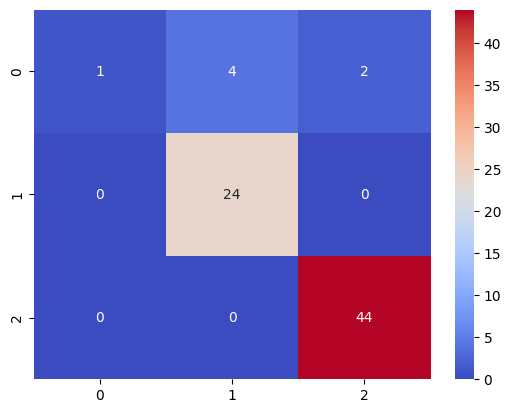

In [113]:
sns.heatmap(data=cm,annot=True,cmap='coolwarm')
plt.show()

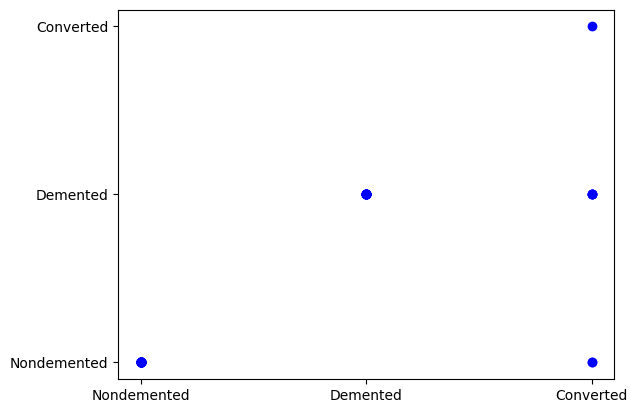

In [118]:
plt.scatter(y_test, y_pred, color='b', marker='o', label='Data Points')